In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [153]:
data = pd.read_csv(r"C:\Users\milan\OneDrive\Desktop\CapStone Project\Water Potability Prediction Project\water_potability.csv")
data.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


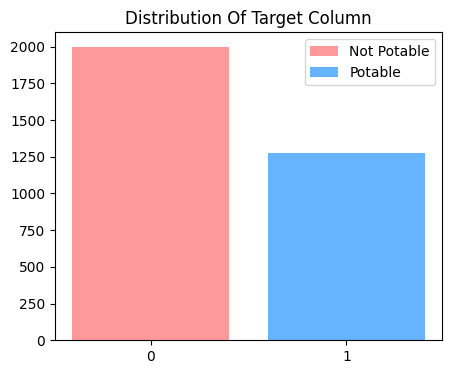

In [154]:
countt = data['Potability'].value_counts()
countt

plt.figure(figsize=(5, 4))
plt.title("Distribution Of Target Column")
plt.bar(countt.index, countt.values, color=['#ff9999','#66b3ff'], label=['Not Potable', 'Potable'])
plt.xticks(range(len(countt)), countt.index)
plt.legend()
plt.show()

The distribution is slightly biased towards category - 0 ie. water not being potable

In [155]:
data.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [156]:
data[data['Potability']==0].isna().sum()

ph                 314
Hardness             0
Solids               0
Chloramines          0
Sulfate            488
Conductivity         0
Organic_carbon       0
Trihalomethanes    107
Turbidity            0
Potability           0
dtype: int64

In [157]:
data[data['Potability']==1].isna().sum()

ph                 177
Hardness             0
Solids               0
Chloramines          0
Sulfate            293
Conductivity         0
Organic_carbon       0
Trihalomethanes     55
Turbidity            0
Potability           0
dtype: int64

Both categories contain null values in 3 columns.
We impute the null values with the mean of specific category and column instead of population mean so that the possibility of clashing with the target variable is avoided.

In [158]:
#calculating mean values for each field for both categories
#for sulfate
sulfate_0 = data[data['Potability']==0]['Sulfate'].mean(skipna=True)
sulfate_1 = data[data['Potability']==1]['Sulfate'].mean(skipna=True)



#for ph
ph_0 = data[data['Potability']==0]['ph'].mean(skipna=True)
ph_1 = data[data['Potability']==1]['ph'].mean(skipna=True)



#for Trihalomethanes
Trihalo_0 = data[data['Potability']==0]['Trihalomethanes'].mean(skipna=True)
Trihalo_1 = data[data['Potability']==1]['Trihalomethanes'].mean(skipna=True)



In [159]:
d = {'Sulfate':[sulfate_0,sulfate_1,data['Sulfate'].mean()],'ph':[ph_0,ph_1,data['ph'].mean()],
     'Trihalomethanes':[Trihalo_0,Trihalo_1,data['Trihalomethanes'].mean()]}

mean_df = pd.DataFrame(data=d,index=['Potability 0','Potability 1','Population mean'])
mean_df

,Sulfate,ph,Trihalomethanes
Potability 0,334.564290,7.085378,66.303555
Potability 1,332.566990,7.073783,66.539684
Population mean,333.775777,7.080795,66.396293


In [160]:
#sulfate mean imputation

data.loc[(data['Potability'] == 0) & (data['Sulfate'].isna()), 'Sulfate'] = sulfate_0
data.loc[(data['Potability'] == 1) & (data['Sulfate'].isna()), 'Sulfate'] = sulfate_1

In [161]:
#ph mean imputation

data.loc[(data['Potability'] == 0) & (data['ph'].isna()), 'ph'] = ph_0
data.loc[(data['Potability'] == 1) & (data['ph'].isna()), 'ph'] = ph_1

In [162]:
#Trihalomethanes mean imputation

data.loc[(data['Potability'] == 0) & (data['Trihalomethanes'].isna()), 'Trihalomethanes'] = Trihalo_0
data.loc[(data['Potability'] == 1) & (data['Trihalomethanes'].isna()), 'Trihalomethanes'] = Trihalo_1

In [163]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn import tree

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [165]:
x = data.drop('Potability', axis=1)
y = data['Potability']

In [166]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [167]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=24, stratify=y)

In [168]:
LR = LogisticRegression()

# Define the LR Parameter Grid
param_grid_logistic = {
    'penalty': ['l1', 'l2'],  # Regularization technique: 'l1' for Lasso (sparse solution), 'l2' for Ridge (smaller coefficients).
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength, with smaller values applying stronger regularization.
    'solver': ['liblinear']  # Algorithm to use for optimization, 'liblinear' is suitable for smaller datasets and supports 'l1' and 'l2' penalties.
}

gridSerch_LR = GridSearchCV(estimator=LR, param_grid=param_grid_logistic, cv=5, scoring='accuracy', n_jobs=-1)
gridSerch_LR.fit(x_train, y_train)

best_params_LR = gridSerch_LR.best_params_
best_params_LR

best_LR = LogisticRegression(random_state=42, **best_params_LR)
best_LR.fit(x_train, y_train)

LogisticRegression(C=0.1, random_state=42, solver='liblinear')

In [169]:
DT = DecisionTreeClassifier(random_state=0)

# Define the DT hyperparameter
param_grid_dt = {
    'criterion': ['gini', 'entropy'],  # Function to measure the quality of a split.
    'max_depth': [2, 3],  # Maximum depth of the tree.
    'min_samples_split': [2, 3, 4],  # Minimum samples required to split a node.
    'min_samples_leaf': [1, 2]  # Minimum samples required to be a leaf node.
}

gridSearch_DT = GridSearchCV(estimator=DT, param_grid=param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
gridSearch_DT.fit(x_train, y_train)

best_params_DT = gridSearch_DT.best_params_
best_params_DT

best_DT = DecisionTreeClassifier(random_state=42, **best_params_DT)
best_DT.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, random_state=42)

In [170]:
base_RF = RandomForestClassifier(random_state=0)

# Define the RF hyperparameter 
param_grid_RF = {
    'n_estimators': [10, 30, 50],  # Number of trees in the forest.
    'criterion': ['gini', 'entropy'],  # Function to measure split quality.
    'max_depth': [2, 3, 4],  # Maximum depth of each tree.
    'min_samples_split': [2, 3, 4, 5],  # Minimum samples required to split a node.
    'min_samples_leaf': [1, 2, 3],  # Minimum samples required to be a leaf node.
    'bootstrap': [True, False]  # Whether to use bootstrap samples.
}

gridSearch_RF = GridSearchCV(estimator=base_RF, param_grid=param_grid_RF, cv=5, scoring='accuracy', n_jobs=-1)
gridSearch_RF.fit(x_train, y_train)

best_params_RF = gridSearch_RF.best_params_
best_params_RF

best_RF = RandomForestClassifier(random_state=42, **best_params_RF)
best_RF.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=4, min_samples_leaf=3,
                       n_estimators=30, random_state=42)

In [171]:
base_SVM = SVC()

# Define the SVM hyperparameter
param_grid_SVM = {
    'C': [0.1, 1, 10],  # Regularization parameter: higher values prioritize fitting the training data, while lower values apply more regularization to avoid overfitting.
    'gamma': [0.1, 1, 0.01],  # Kernel coefficient for 'rbf' kernel: controls the influence of individual training examples, with higher values leading to more complex models.
    'kernel': ['rbf', 'linear']  # Kernel type: 'rbf' for non-linear classification, 'linear' for linear decision boundaries.
}

gridsearch_SVM = GridSearchCV(base_SVM, param_grid_SVM, refit=True)
gridsearch_SVM.fit(x_train, y_train)

best_params_svm = gridsearch_SVM.best_params_

best_svm = SVC(**best_params_svm)
best_svm.fit(x_train, y_train)

SVC(C=1, gamma=0.1)

In [172]:
knn = KNeighborsClassifier()

# Define the KNN hyperparameter
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors: determines how many neighbors to consider when classifying a point.
    'weights': ['uniform', 'distance'],  # Weight function: 'uniform' gives all neighbors equal weight, while 'distance' weighs closer neighbors more.
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric: 'euclidean' is standard straight-line distance, 'manhattan' is sum of absolute differences, and 'minkowski' is a generalized distance metric.
}

gridsearch_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, refit=True)
gridsearch_knn.fit(x_train, y_train)

best_params_knn = gridsearch_knn.best_params_


best_knn = KNeighborsClassifier(**best_params_knn)
best_knn.fit(x_train, y_train)


KNeighborsClassifier(metric='manhattan', n_neighbors=7)

In [173]:
from xgboost import XGBClassifier

In [174]:
# Specify the constant parameters of the XGBoost classifier
base_XGB = XGBClassifier(
    objective='binary:logistic',  # For binary classification
    nthread=4,  # Number of threads for parallel processing
    seed=42  # Random seed for reproducibility
)


# Define the tunable hyperparameters and their respective value ranges
param_grid_xg = {
    'max_depth': range(2, 10, 1),  # Depth of each tree
    'n_estimators': range(60, 220, 40),  # Number of boosting rounds
    'learning_rate': [0.1, 0.01, 0.05]  # Step size for updates
    # Add other hyperparameters you want to tune here
}



# Configure the GridSearchCV object
grid_search_XG = GridSearchCV(
    estimator=base_XGB,
    param_grid=param_grid_xg,
    scoring='accuracy',  # Use ROC AUC metric for comparison
    n_jobs=50,  # Number of parallel jobs
    cv=10,  # 10-fold cross-validation
    verbose=True  # Print progress
)

# Fit the model using your data
grid_search_XG.fit(x_train, y_train)

best_params_xgb = grid_search_XG.best_params_

best_xgb = XGBClassifier(**best_params_xgb)
best_xgb.fit(x_train, y_train)


Fitting 10 folds for each of 96 candidates, totalling 960 fits


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [175]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier


# Define the base neural network model
def create_model():
    model = Sequential()
    model.add(Dense(units=64, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Initialize KerasClassifier for use with GridSearchCV
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define hyperparameters grid
param_grid = {
    'batch_size': [16, 32],
    'epochs': [50, 100],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')

# Search for the best hyperparameters
grid_search.fit(x_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_


In [176]:
from sklearn.naive_bayes import GaussianNB

In [177]:
nb_model = GaussianNB()

param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]# Add hyperparameters you want to tune here
}

grid_search = GridSearchCV(estimator=nb_model, param_grid=param_grid, cv=3, scoring='accuracy')

grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(x_test)

In [178]:
print(accuracy_score(y_test, y_pred_best))

0.6073245167853509


In [179]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Initialize AdaBoost classifier
ada = AdaBoostClassifier()

# Define hyperparameters for tuning
param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1, 1.5]
}

# GridSearch for hyperparameter tuning
grid_search_ada = GridSearchCV(estimator=ada, param_grid=param_grid_ada, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_ada.fit(x_train, y_train)

# Get best parameters and performance
print("Best parameters:", grid_search_ada.best_params_)
print("Best cross-validated score:", grid_search_ada.best_score_)

# Make predictions on test set
y_pred_ada = grid_search_ada.predict(x_test)

# Accuracy and classification report
print("Test Accuracy:", accuracy_score(y_test, y_pred_ada))
print("Classification Report:\n", classification_report(y_test, y_pred_ada))


Best parameters: {'learning_rate': 1, 'n_estimators': 50}
Best cross-validated score: 0.7435606168716882
Test Accuracy: 0.7314343845371313
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.86      0.80       600
           1       0.71      0.53      0.61       383

    accuracy                           0.73       983
   macro avg       0.72      0.70      0.70       983
weighted avg       0.73      0.73      0.72       983



In [180]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)

# Reshape input to 3D for LSTM (samples, time steps, features)
X_reshaped = np.reshape(X_scaled, (X_scaled.shape[0], 1, X_scaled.shape[1]))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.3, random_state=42)

# Build LSTM model function (for GridSearchCV)
def create_lstm_model(optimizer='adam', dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the model using KerasClassifier for GridSearchCV
model = KerasClassifier(
    model=create_lstm_model, 
    epochs=10, 
    batch_size=32, 
    verbose=0
)

# Define hyperparameters to tune
param_grid_lstm = {
    'model__optimizer': ['adam', 'rmsprop'],  # Use 'model__' to refer to the function args
    'model__dropout_rate': [0.2, 0.3, 0.5],  # Correctly map dropout_rate
    'batch_size': [16, 32, 64],
    'epochs': [10, 50]
}

# Perform GridSearchCV
grid_search_lstm = GridSearchCV(estimator=model, param_grid=param_grid_lstm, cv=3, n_jobs=-1)
grid_search_lstm.fit(X_train, y_train)

# Get best parameters and performance
print("Best parameters:", grid_search_lstm.best_params_)
print("Best cross-validated score:", grid_search_lstm.best_score_)

# Evaluate on test data
y_pred_lstm = grid_search_lstm.predict(X_test)

Best parameters: {'batch_size': 16, 'epochs': 10, 'model__dropout_rate': 0.2, 'model__optimizer': 'adam'}
Best cross-validated score: 0.6022676202534533


In [196]:
# Evaluate the optimized model on the train data
print("LOG", accuracy_score(y_test, best_LR.predict(x_test)))
print("TREE", accuracy_score(y_test, best_DT.predict(x_test)))
print("Random", accuracy_score(y_test, best_RF.predict(x_test)))
print("SVM", accuracy_score(y_test, best_svm.predict(x_test)))
print("KNN", accuracy_score(y_test, best_knn.predict(x_test)))
print("XGB", accuracy_score(y_test, best_xgb.predict(x_test)))
print("Neural", accuracy_score(y_test, best_model.predict(x_test)))
print("Naive Bayes", accuracy_score(y_test, y_pred_best))
print("ADA:", accuracy_score(y_test, y_pred_ada))
print("LSTM", accuracy_score(y_test, y_pred_lstm))

LOG 0.6317395727365208
TREE 0.5493387589013224
Random 0.5778229908443541
SVM 0.5991861648016277
KNN 0.5666327568667345
XGB 0.5442522889114955
Neural 0.6083418107833164
Naive Bayes 0.6083418107833164
ADA: 0.555442522889115
LSTM 0.6276703967446592
